In [3]:
import matplotlib.pyplot as plt
import numpy as np

import triangle as tr

In [4]:

A = dict(vertices=np.array(((0, 0), (1, 0), (1, 1), (0, 1))))

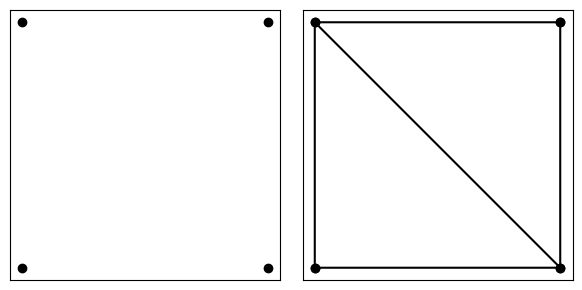

In [5]:

B = tr.triangulate(A)
tr.compare(plt, A, B)
plt.show()

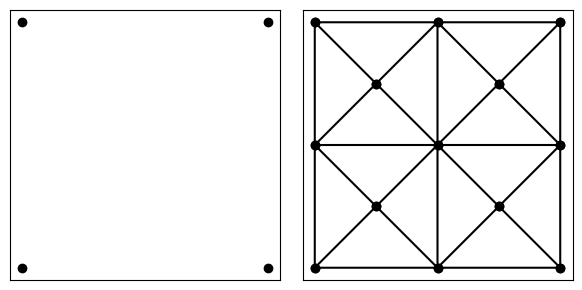

In [6]:
B = tr.triangulate(A, 'qa0.1')
tr.compare(plt, A, B)
plt.show()

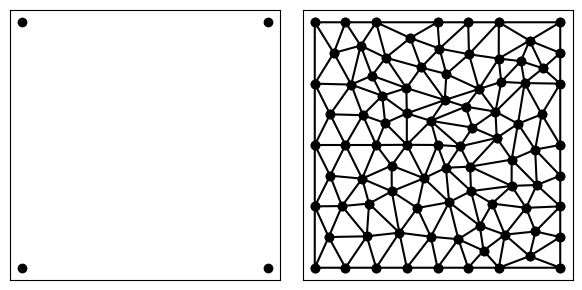

In [7]:

B = tr.triangulate(A, 'qa0.01')
tr.compare(plt, A, B)
plt.show()

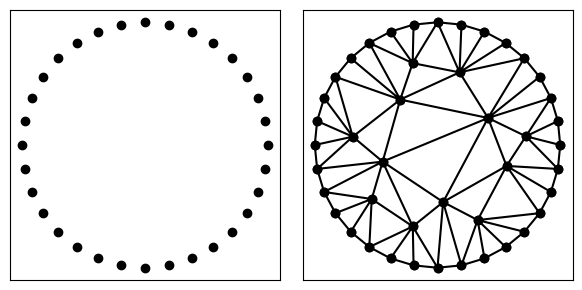

In [8]:
N = 32
theta = np.linspace(0, 2 * np.pi, N, endpoint=False)
pts = np.stack([np.cos(theta), np.sin(theta)], axis=1)
A = dict(vertices=pts)
B = tr.triangulate(A, 'q')
tr.compare(plt, A, B)
plt.show()

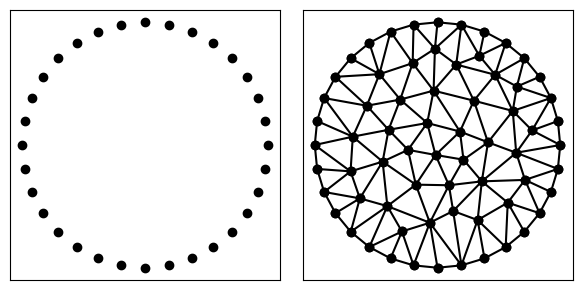

In [9]:
N = 32
theta = np.linspace(0, 2 * np.pi, N, endpoint=False)
pts = np.stack([np.cos(theta), np.sin(theta)], axis=1)
A = dict(vertices=pts)
B = tr.triangulate(A, 'qa0.05')
tr.compare(plt, A, B)
plt.show()

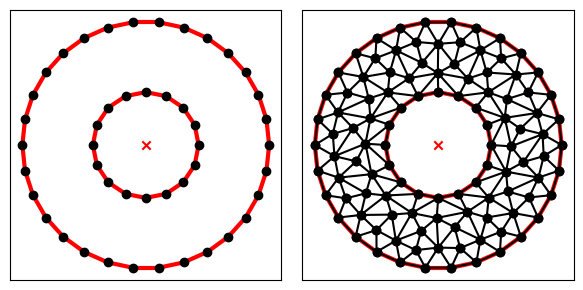

In [11]:
def circle(N, R):
    i = np.arange(N)
    theta = i * 2 * np.pi / N
    pts = np.stack([np.cos(theta), np.sin(theta)], axis=1) * R
    seg = np.stack([i, i + 1], axis=1) % N
    return pts, seg


pts0, seg0 = circle(30, 1.4)
pts1, seg1 = circle(16, 0.6)
pts = np.vstack([pts0, pts1])
seg = np.vstack([seg0, seg1 + seg0.shape[0]])

A = dict(vertices=pts, segments=seg, holes=[[0, 0]])
B = tr.triangulate(A, 'qpa0.05')
tr.compare(plt, A, B)
plt.show()

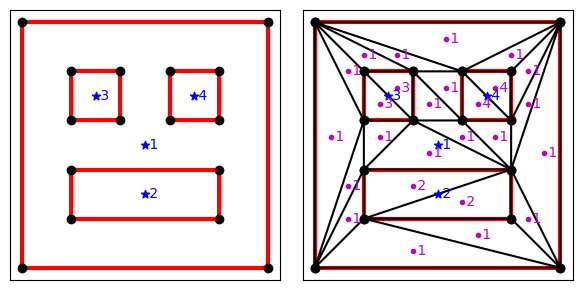

In [12]:
# arrays to fill in with input
vertices = []
segments = []
regions = []


# make a box with given dims and place given attribute at its center
def make_box(x, y, w, h, attribute):

    i = len(vertices)

    vertices.extend([
        [x, y],
        [x + w, y],
        [x + w, y + h],
        [x, y + h],
    ])

    segments.extend([
        (i + 0, i + 1),
        (i + 1, i + 2),
        (i + 2, i + 3),
        (i + 3, i + 0),
    ])

    regions.append([x + 0.5 * w, y + 0.5 * h, attribute, 0])


# generate some input
make_box(0, 0, 5, 5, 1)
make_box(1, 1, 3, 1, 2)
make_box(1, 3, 1, 1, 3)
make_box(3, 3, 1, 1, 4)

A = dict(vertices=vertices, segments=segments, regions=regions)
B = tr.triangulate(A, 'pA')

tr.compare(plt, A, B)
plt.show()

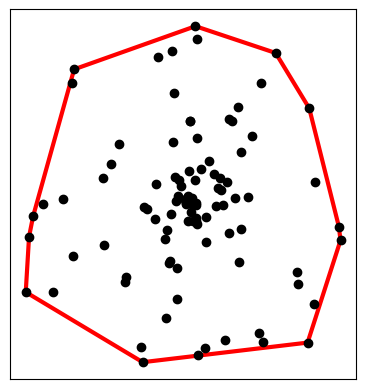

In [13]:
dots = tr.get_data('dots')
pts = dots['vertices']
segs = tr.convex_hull(pts)

tr.plot(plt.axes(), vertices=pts, segments=segs)

plt.show()

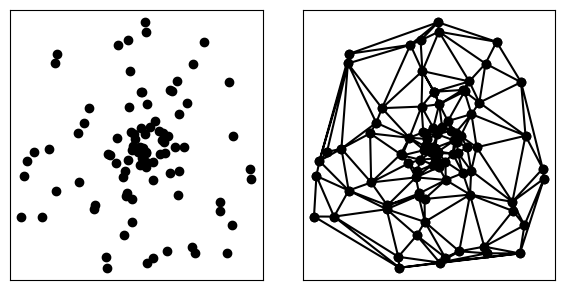

In [14]:
d0 = tr.get_data('dots')
d1 = tr.triangulate(d0)
tr.compare(plt, d0, d1)
plt.show()